# Query to reference

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
from matplotlib import pyplot as plt
import scmulti

In [4]:
scrna = sc.read_h5ad('../data/10xpbmc10k-2020/expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
scatac = sc.read_h5ad('../data/10xpbmc10k-2020/peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 10000 × 40018
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## Define reference and query data

In [197]:
# reference
scrna1 = scrna[:-2000]
scatac1 = scatac[:-2000]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [198]:
# query
scrna2 = scrna[-2000:]
scatac2 = scatac[-2000:]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [234]:
model = scmulti.models.MultiVAE(
    adatas=[[scrna1], [scatac1]],
    names=[['scRNA-seq-ref'], ['scATAC-seq-ref']],
    pair_groups=[[0], [0]],
    condition='1', #conditional version '0' or '1', comment out or set to None if not conditional
    batch_labels=[[0], [1]],
    z_dim=20,
    h_dim=128,
    hiddens=[[], []],
    output_activations=['linear', 'linear'],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-4,
    integ_coef=1e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [235]:
model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=5000
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |██------------------| 10.0% iter=1001/10000, time=396.95(s), loss=0.3036, recon=0.2576, kl=38.7596, integ=4.5478, val_loss=0.2407, val_recon=0.2157, val_kl=47.4565, val_integ=2.4067
 |████----------------| 20.0% iter=2001/10000, time=410.35(s), loss=0.2413, recon=0.2216, kl=54.9833, integ=1.7888, val_loss=0.2238, val_recon=0.2114, val_kl=58.4110, val_integ=1.0003
 |██████--------------| 30.0% iter=3001/10000, time=395.16(s), loss=0.2277, recon=0.2163, kl=66.3691, integ=0.7886, val_loss=0.2188, val_recon=0.2097, val_kl=68.3218, val_integ=0.4946
 |████████------------| 40.0% iter=4001/10000, time=416.92(s), loss=0.2250, recon=0.2157, kl=72.2229, integ=0.4075, val_loss=0.2173, val_recon=0.2088, val_kl=67.9489, val_integ=0.3074
 |██████████----------| 50.0% iter=5001/10000, time=429.91(s), loss=0.2244, recon=0.2152, kl=64.7051, integ=0.3245, val_loss=0.2172, val_recon=0.2085, val_kl=61.1597, val_integ=0.2602
 |████████████--------| 60.0% iter=6001/10000, time=383.86(s), loss=0.2217, reco

In [236]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,0.303571,0.257571,38.759572,4.547783,0.240724,0.215708,47.456517,2.406677
1,2000,0.241270,0.221600,54.983337,1.788819,0.223784,0.211444,58.411038,1.000325
2,3000,0.227673,0.216324,66.369128,0.788585,0.218781,0.209735,68.321825,0.494617
3,4000,0.224965,0.215691,72.222876,0.407453,0.217281,0.208771,67.948851,0.307356
4,5000,0.224392,0.215205,64.705075,0.324451,0.217197,0.208479,61.159690,0.260178
5,6000,0.221664,0.212798,60.722480,0.279399,0.215833,0.207904,58.665268,0.206258
6,7000,0.220464,0.212100,59.963619,0.236802,0.214905,0.207449,57.459162,0.171063
7,8000,0.221436,0.213349,58.368519,0.225065,0.214381,0.207147,57.196384,0.151475
8,9000,0.220530,0.212790,57.326299,0.200705,0.213832,0.206700,56.589710,0.147298
9,9999,0.220297,0.212478,56.676697,0.215115,0.213700,0.206640,55.569872,0.150276


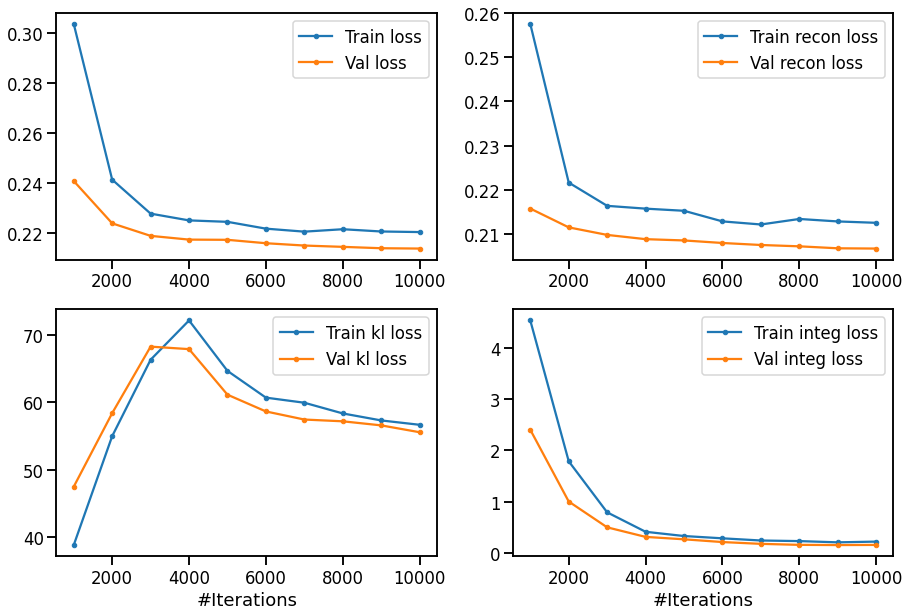

In [237]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

In [238]:
z = model.predict(
    adatas=[[scrna1], [scatac1]],
    names=[['scRNA-seq-ref'], ['scATAC-seq-ref']],
    batch_labels=[[0], [1]],
    batch_size=64,
)
z

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 16000 × 20
    obs: 'modality', 'cell_type', 'batch'

In [239]:
sc.pp.neighbors(z)
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical


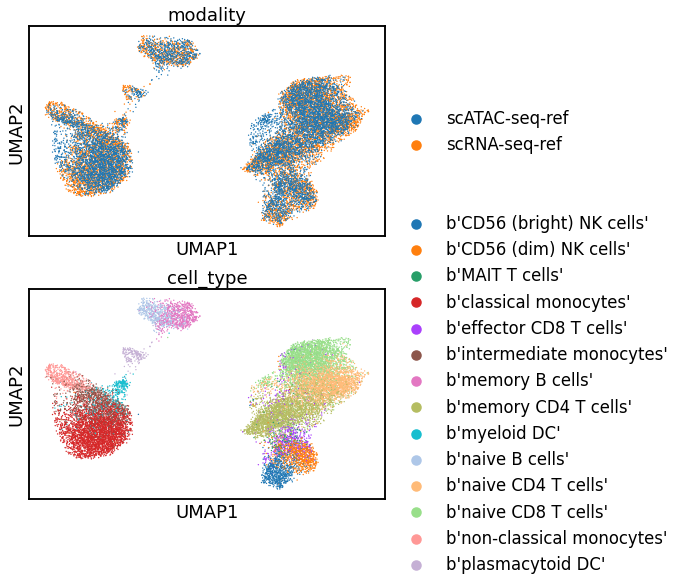

In [240]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

## Surgery

In [242]:
new_model = scmulti.operate(model, 
                   adatas=[[scrna2],[scatac2]],
                    names=[['scRNA-seq2-query'], ['scATAC-seq2-query']],
                    pair_groups=[[1],[1]],
                    batch_labels=[[2],[3]])

In [243]:
new_model.train(
    n_iters=3000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=1500
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |██████--------------| 33.4% iter=1001/3000, time=239.21(s), loss=0.2238, recon=0.2185, kl=34.9412, integ=0.4123, val_loss=0.2173, val_recon=0.2114, val_kl=34.8702, val_integ=0.3534
 |█████████████-------| 66.7% iter=2001/3000, time=229.17(s), loss=0.2233, recon=0.2160, kl=35.4517, integ=0.4044, val_loss=0.2176, val_recon=0.2105, val_kl=34.7118, val_integ=0.3577
 |████████████████████| 100.0% iter=3000/3000, time=223.08(s), loss=0.2228, recon=0.2152, kl=35.4761, integ=0.4063, val_loss=0.2172, val_recon=0.2101, val_kl=35.2203, val_integ=0.3567


In [244]:
new_model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,0.223810,0.218485,34.941174,0.412250,0.217252,0.211394,34.870231,0.353391
1,2000,0.223325,0.215987,35.451705,0.404369,0.217551,0.210503,34.711811,0.357706
2,2999,0.222839,0.215228,35.476080,0.406319,0.217225,0.210136,35.220305,0.356664


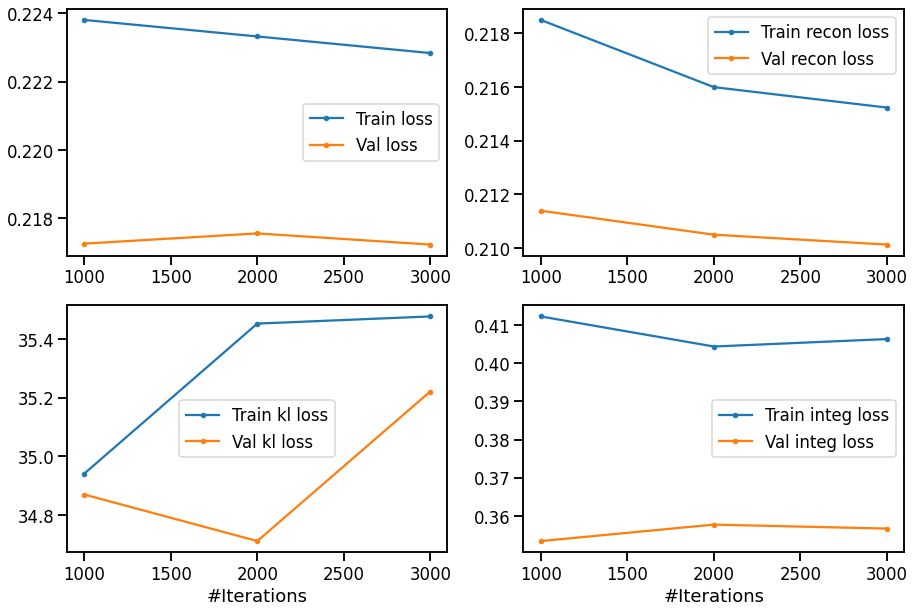

In [245]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(new_model.history['iteration'], new_model.history['train_loss'], '.-', label='Train loss');
plt.plot(new_model.history['iteration'], new_model.history['val_loss'], '.-', label='Val loss');
plt.legend();

plt.subplot(222);
plt.plot(new_model.history['iteration'], new_model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(new_model.history['iteration'], new_model.history['val_recon'], '.-', label='Val recon loss');
plt.legend();

plt.subplot(223);
plt.plot(new_model.history['iteration'], new_model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(new_model.history['iteration'], new_model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(new_model.history['iteration'], new_model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(new_model.history['iteration'], new_model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

In [246]:
z = new_model.predict(
    adatas=[[scrna1, scrna2], [scatac1, scatac2]],
    names=[['scRNA-seq1-ref', 'scRNA-seq2-query'], ['scATAC-seq1-ref', 'scATAC-seq2-query']],
    batch_labels=[[0, 2], [1, 3]], #same as in train
    batch_size=64,
)
z

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 20000 × 20
    obs: 'modality', 'cell_type', 'batch'

In [247]:
sc.pp.neighbors(z)
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical


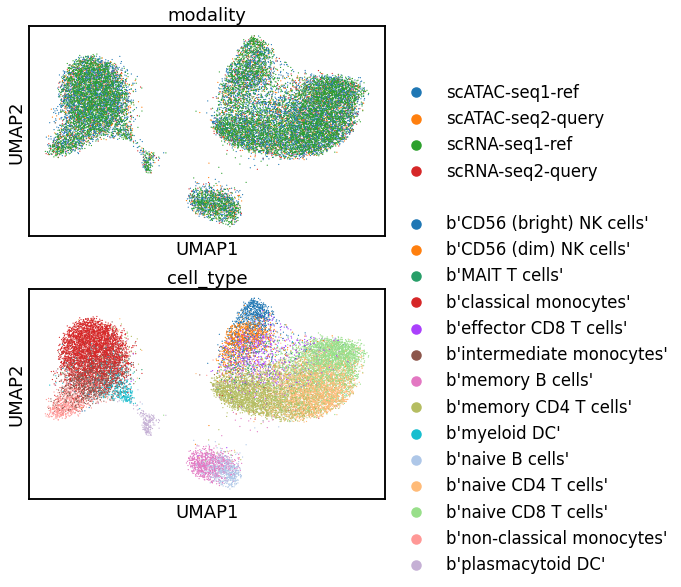

In [248]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)